<a href="https://colab.research.google.com/github/rohanvitrouthu/sectoralstockanalysis/blob/main/Oil_and_Gas_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_path = '/content/drive/MyDrive/DATA 606 Capstone/Dataset/Merged Data'

In [4]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Oil_and_Gas.csv")

In [5]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28807 entries, 0 to 28806
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                28807 non-null  object 
 1   Symbol              28807 non-null  object 
 2   Series              28807 non-null  object 
 3   Prev Close          28807 non-null  float64
 4   Open                28807 non-null  float64
 5   High                28807 non-null  float64
 6   Low                 28807 non-null  float64
 7   Last                28807 non-null  float64
 8   Close               28807 non-null  float64
 9   VWAP                28807 non-null  float64
 10  Volume              28807 non-null  int64  
 11  Turnover            28807 non-null  float64
 12  Trades              14736 non-null  float64
 13  Deliverable Volume  26578 non-null  float64
 14  %Deliverble         26578 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 3.3

In [6]:
# Summary statistics of the dataset
print(sector_data.describe())

         Prev Close          Open          High           Low          Last  \
count  28807.000000  28807.000000  28807.000000  28807.000000  28807.000000   
mean     493.738444    494.504725    502.274754    486.036109    493.762226   
std      408.390900    409.192077    415.355774    402.022453    408.402731   
min       43.500000     44.800000     45.700000     43.000000     43.750000   
25%      259.575000    260.000000    263.650000    255.550000    259.500000   
50%      361.900000    362.100000    368.850000    356.000000    362.000000   
75%      573.475000    574.550000    584.600000    563.625000    574.000000   
max     3220.850000   3298.000000   3298.000000   3141.300000   3223.000000   

              Close          VWAP        Volume      Turnover        Trades  \
count  28807.000000  28807.000000  2.880700e+04  2.880700e+04  1.473600e+04   
mean     493.790232    494.205709  3.896588e+06  1.870232e+14  6.697951e+04   
std      408.491475    408.692816  7.246775e+06  4.

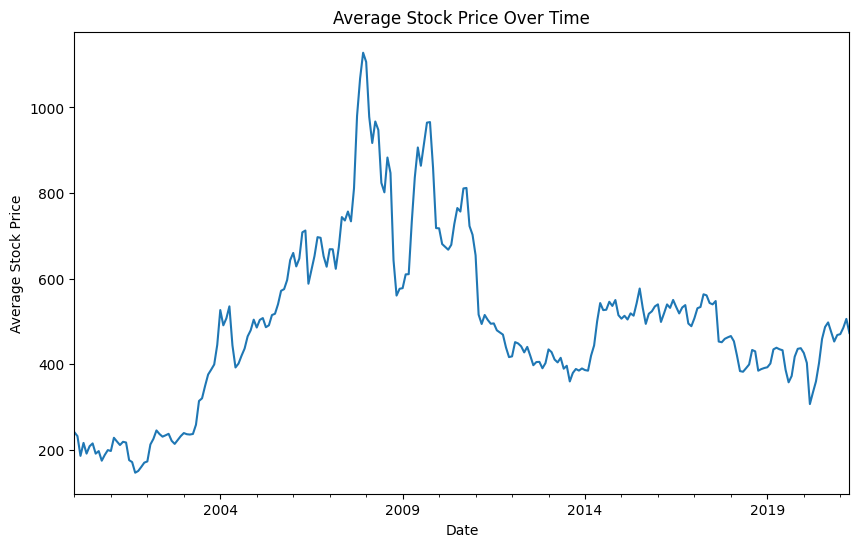

In [7]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

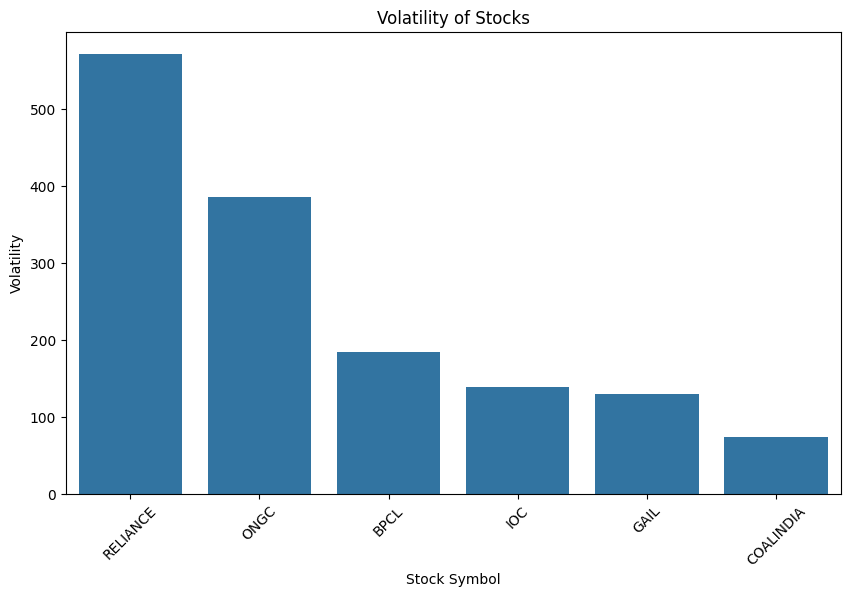

In [8]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

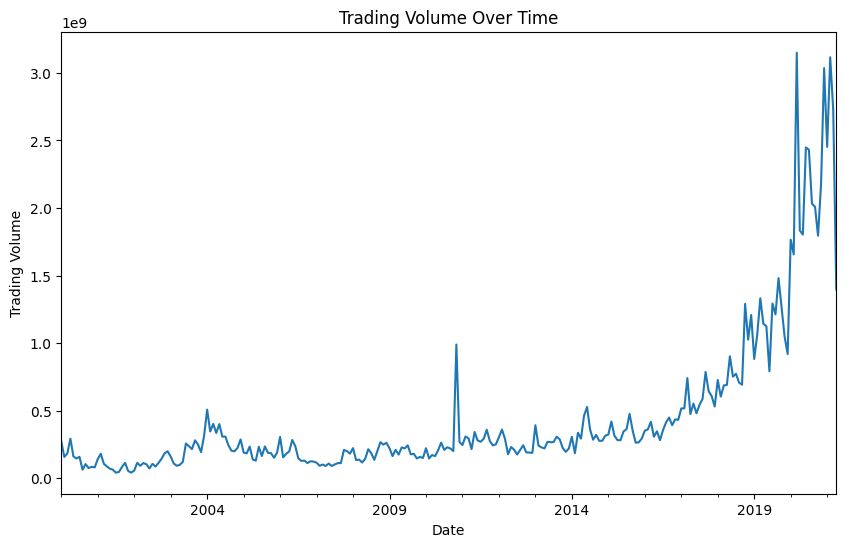

In [9]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


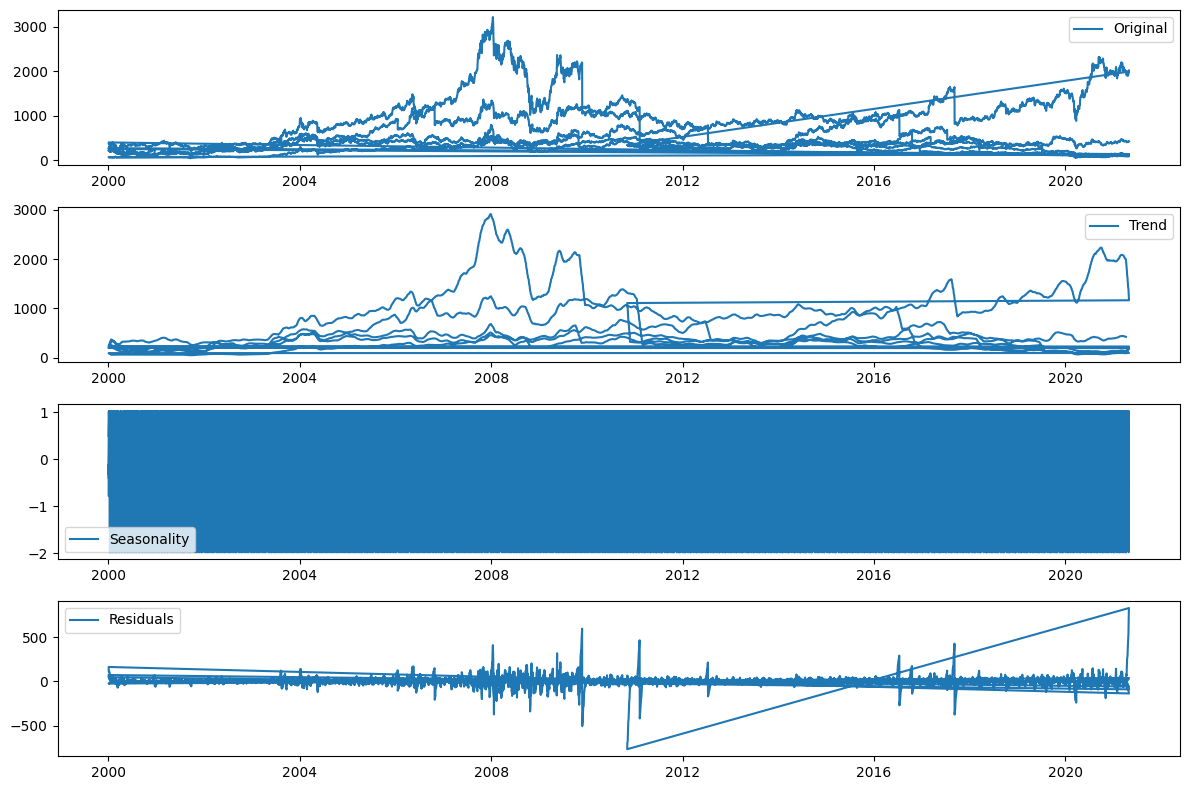

In [10]:
# Seasonal decomposition of stock prices
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sector_data['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sector_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


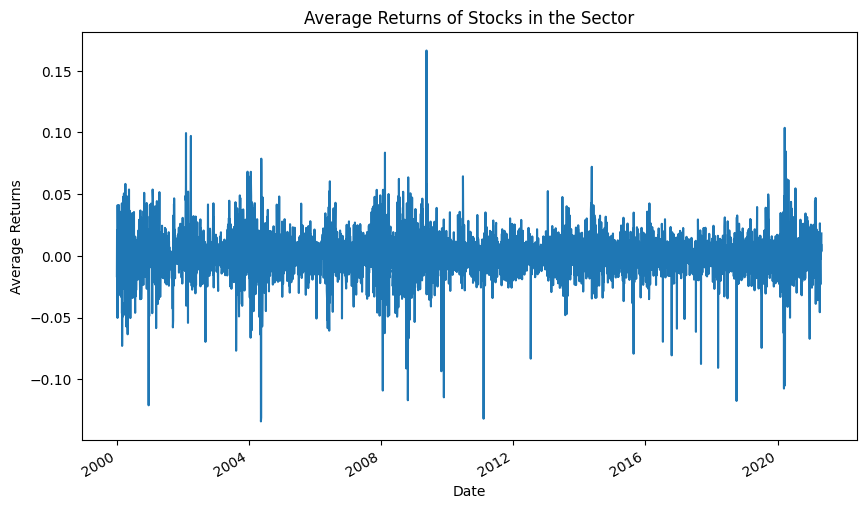

In [11]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()